<a href="https://colab.research.google.com/github/zaccleong/Cifar10_TL-Augmentation/blob/main/Copy_of_TL_VGG19_Cifar10_76.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import pandas as pd
from keras import optimizers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras import utils
from keras import optimizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



170508288/170498071 [==============================] - 3s 0us/step


In [4]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.3)

In [5]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19
from keras.models import Model
from pickle import dump

In [6]:
#Change y_train and y_test shape from n,1 to n,10 to represent 10 categories
n_classes=10
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_val = tf.keras.utils.to_categorical(y_val, n_classes)
y_train.shape


(35000, 10)

In [9]:
X_train.shape

(35000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_val.shape

(15000, 10)

In [10]:
Batch_size=100
train_datagen = ImageDataGenerator(rescale=1. / 255,zoom_range=0.1, rotation_range=5,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.05, 
                                   horizontal_flip=False, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255,zoom_range=0.1, rotation_range=5,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.05, 
                                   horizontal_flip=False, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(X_train, y_train,batch_size=Batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=Batch_size)
test_generator = test_datagen.flow(X_test, y_test)

In [72]:
#Example of augmented data
train_datagen_og = ImageDataGenerator(rescale=1. / 255)

result_data     = train_datagen.flow(X_train[2:3], y_train[2:3], batch_size=128)
result_data_og = train_datagen_og.flow(X_train[2:3], y_train[2:3], batch_size=128)

In [73]:
def getSamplesFromDataGen(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    for i in range(0,1):
        plt.imshow(a[i])
        plt.title(b[i])
        plt.show() 

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


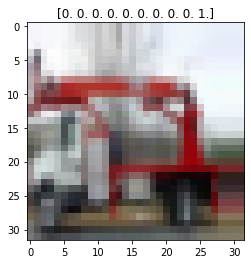

In [77]:
# Random augmentation of zoom, rotation and shearing
getSamplesFromDataGen(result_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


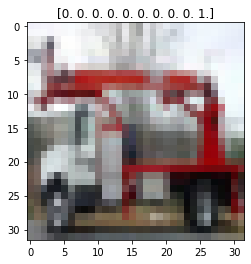

In [75]:
#Original image without augmentation
getSamplesFromDataGen(result_data_og)

In [47]:
from keras.applications import vgg19
from keras.models import Model
import keras



vgg = vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(32,32,3))




output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1','block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
      

80150528/80134624 [==============================] - 0s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
opt =tf.keras.optimizers.Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])
              
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, steps_per_epoch=X_train.shape[0]//Batch_size, epochs=30,
                              validation_data=val_generator, validation_steps=Batch_size
                    ,verbose=1)  

Epoch 1/30
350/350 [==============================] - 42s 104ms/step - loss: 2.1389 - accuracy: 0.2015 - val_loss: 1.7198 - val_accuracy: 0.4556
Epoch 2/30
350/350 [==============================] - 29s 82ms/step - loss: 1.7588 - accuracy: 0.3794 - val_loss: 1.3829 - val_accuracy: 0.5775
Epoch 3/30
350/350 [==============================] - 29s 83ms/step - loss: 1.5557 - accuracy: 0.4720 - val_loss: 1.2113 - val_accuracy: 0.6380
Epoch 4/30
350/350 [==============================] - 31s 88ms/step - loss: 1.4335 - accuracy: 0.5278 - val_loss: 1.0864 - val_accuracy: 0.6696
Epoch 5/30
350/350 [==============================] - 29s 83ms/step - loss: 1.3297 - accuracy: 0.5685 - val_loss: 1.0520 - val_accuracy: 0.6790
Epoch 6/30
350/350 [==============================] - 29s 82ms/step - loss: 1.2499 - accuracy: 0.6050 - val_loss: 0.9811 - val_accuracy: 0.6915
Epoch 7/30
350/350 [==============================] - 29s 82ms/step - loss: 1.1914 - accuracy: 0.6250 - val_loss: 0.9602 - val_accuracy

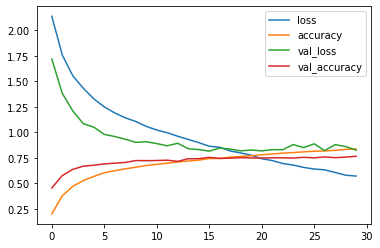

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.save('cifar10_TL_cnn_ADAM.h5')

In [ ]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(y_test,axis=1)

In [ ]:
#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Normalized confusion matrix


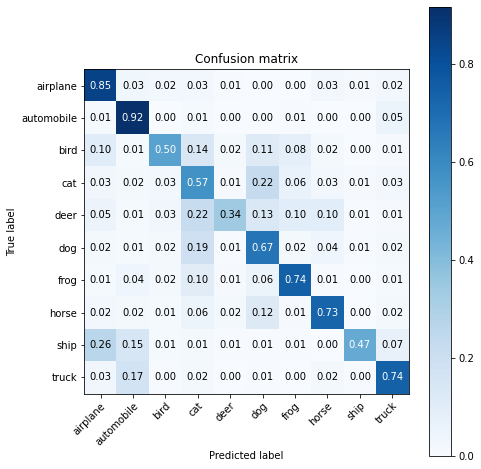

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix', normalize = True)